#Análisis Exploratorio de Datos (EDA) de Energía, Patrones y Anomalías de un Autogenerador
##realizado por:  Bayron A. Guamá

##resumen:
##1. Limpieza de datos
##2. Análisis y Visualización
##3. Conclusiones


###Fuente de datos: anonimo


#1. Carga de librerias, datos, identificación de nulos, limpieza de datos y creación de nuevas variables.

In [ ]:


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import janitor

Carga de Datos: Se carga la base de datos de energía (de un autogenerador) desde un archivo Excel (DatosAutogeneradoresGranEscala.xlsx) en un DataFrame de pandas.

In [ ]:
db = pd.read_excel("/content/DatosAutogeneradoresGranEscala.xlsx")

Breve Descripción del Contenido: Se visualizan las primeras filas del DataFrame para obtener una vista previa de la estructura y el contenido de los datos

In [ ]:
print("---------  breve descripción del contenido -----------")
print("")
db.head()

---------  breve descripción del contenido -----------



,Día Consumo,Hora,Activa\n[kWh],Excedentes\n[kWh],Inductiva\n[kVArh],Capacitiva\n[kVArh]
0,2023/03/21,1,721.6252,0.0,34.5000,25.8752
1,2023/03/21,2,966.0000,0.0,140.8752,5.7500
2,2023/03/21,3,1313.8752,0.0,373.7500,0.0000
3,2023/03/21,4,1598.5000,0.0,580.7500,0.0000
4,2023/03/21,5,1541.0000,0.0,598.0000,0.0000


Resumen de Información Estadística: Se genera un resumen estadístico del DataFrame, incluyendo medidas como la media, la desviación estándar, los valores mínimo y máximo, y los cuartiles para las columnas numéricas.

In [ ]:
print("---------  resumen información estadistica  -----------")
print("")
db.describe()

---------  resumen información estadistica  -----------



,Hora,Activa\n[kWh],Excedentes\n[kWh],Inductiva\n[kVArh],Capacitiva\n[kVArh]
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,12.500000,1056.601488,42.276330,332.386948,14.553082
std,6.922581,609.900048,168.384606,225.512182,57.526952
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,6.750000,513.906400,0.000000,140.875200,0.000000
50%,12.500000,1221.875200,0.000000,345.000000,0.000000
75%,18.250000,1578.375200,0.000000,474.375200,2.875200
max,24.000000,2190.750000,1380.000000,1247.750000,782.000000


Limpieza de Títulos de las Columnas: Se limpian los nombres de las columnas para facilitar su manejo. Esto incluye la eliminación de caracteres especiales, espacios y la conversión a minúsculas

In [ ]:
## limpiar titulos de las columnas
db.columns = db.columns.str.replace('\n', ' ', regex=True)
db.columns = db.columns.str.strip()
db.columns = db.columns.str.replace(' ', '_')
db.columns = db.columns.str.lower()

Resumen de Información del Tipo de Variables: Se verifica el tipo de datos de cada columna y el número de valores no nulos utilizando db.info().

In [ ]:
print("---------  resumen informacion tipo de variables  -----------")
print("")
db.info()

---------  resumen informacion tipo de variables  -----------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   día_consumo         8784 non-null   object 
 1   hora                8784 non-null   int64  
 2   activa_[kwh]        8784 non-null   float64
 3   excedentes_[kwh]    8784 non-null   float64
 4   inductiva_[kvarh]   8784 non-null   float64
 5   capacitiva_[kvarh]  8784 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 411.9+ KB


Visualización de Valores Faltantes: Se genera un mapa de calor para visualizar la presencia de valores faltantes en el DataFrame

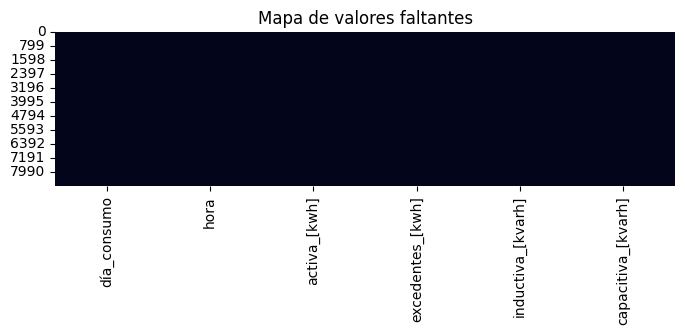

In [ ]:
# Visualizar valores faltantes
plt.figure(figsize=(8,2))
sns.heatmap(db.isna(), cbar=False)
plt.title('Mapa de valores faltantes')
plt.show()

Conversión a Formato de Fecha: La columna 'día_consumo' se convierte a formato de fecha y hora para permitir análisis temporales.
Separación de Componentes de Fecha: Se extraen el año, el mes y el día de la columna 'día_consumo' en nuevas columnas separadas.
Información del DataFrame Actualizada: Se muestra la información actualizada del DataFrame después de agregar las nuevas columnas de fecha.

In [ ]:
#para facilitar el manejo de la fecha, la vamos a pasar a formato date
db["día_consumo"] = pd.to_datetime(db["día_consumo"], format='%Y/%m/%d')
#mas formatos: %d/%m/%Y

In [ ]:
#separamos en nuevas columnas el dia, mes y año.
db['año'] = db['día_consumo'].dt.year
db['mes'] = db['día_consumo'].dt.month
db['dia'] = db['día_consumo'].dt.day

In [ ]:
#ordenar = db['dia'].unique() --> muestra los valores unicos de esta columna
#db['mes'].value_counts() --> cuenta los valores unicos de la columna
#sorted(ordenar)
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   día_consumo         8784 non-null   datetime64[ns]
 1   hora                8784 non-null   int64         
 2   activa_[kwh]        8784 non-null   float64       
 3   excedentes_[kwh]    8784 non-null   float64       
 4   inductiva_[kvarh]   8784 non-null   float64       
 5   capacitiva_[kvarh]  8784 non-null   float64       
 6   año                 8784 non-null   int32         
 7   mes                 8784 non-null   int32         
 8   dia                 8784 non-null   int32         
dtypes: datetime64[ns](1), float64(4), int32(3), int64(1)
memory usage: 514.8 KB


In [ ]:
#df_agrupado = df[['Genre', 'Country']].groupby('Genre').count().reset_index().rename(columns = {'Country':'Cuenta'})
#db[['año','hora']]
db[['año','mes' ,'hora']].groupby('año').count()

,mes,hora
año,,
2023,6864,6864
2024,1920,1920


observamos el nuevo dataframe con las nuevas columnas creadas.

In [ ]:
db.describe()

,día_consumo,hora,activa_[kwh],excedentes_[kwh],inductiva_[kvarh],capacitiva_[kvarh],año,mes,dia
count,8784,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,2023-09-19 12:00:00,12.500000,1056.601488,42.276330,332.386948,14.553082,2023.218579,6.513661,15.756831
min,2023-03-21 00:00:00,1.000000,0.000000,0.000000,0.000000,0.000000,2023.000000,1.000000,1.000000
25%,2023-06-20 00:00:00,6.750000,513.906400,0.000000,140.875200,0.000000,2023.000000,4.000000,8.000000
50%,2023-09-19 12:00:00,12.500000,1221.875200,0.000000,345.000000,0.000000,2023.000000,7.000000,16.000000
75%,2023-12-20 00:00:00,18.250000,1578.375200,0.000000,474.375200,2.875200,2023.000000,10.000000,23.000000
max,2024-03-20 00:00:00,24.000000,2190.750000,1380.000000,1247.750000,782.000000,2024.000000,12.000000,31.000000
std,NaN,6.922581,609.900048,168.384606,225.512182,57.526952,0.413306,3.451430,8.812031


Estadísticas por Año: Se calcula la media de 'activa_[kwh]' agrupada por año para observar las tendencias anuales.
Filtrado por Año: Se crea un nuevo DataFrame (db_2023) conteniendo únicamente los datos del año 2023 para un análisis más detallado.

In [ ]:
#media de activa por año
db[['año','activa_[kwh]']].groupby('año').mean()

,activa_[kwh]
año,
2023,1057.412447
2024,1053.702308


In [ ]:
db_2023 = db[db['año'] == 2023]

In [ ]:
#datos estadisticos de activa_[kwh] agrupados por mes por mes

db_2023[['mes','activa_[kwh]']].groupby('mes').mean()
db_meses_2023 = pd.DataFrame(columns=['mean','median','std'])
db_meses_2023['mean'] = db_2023[['mes','activa_[kwh]']].groupby('mes').mean()
db_meses_2023['median'] = db_2023[['mes','activa_[kwh]']].groupby('mes').median()
db_meses_2023['std'] = db_2023[['mes','activa_[kwh]']].groupby('mes').std()

db_meses_2023

,mean,median,std
mes,,,
3,1103.510047,1233.3752,589.312884
4,884.018668,904.1876,632.913725
5,1001.350230,1116.9376,610.734109
6,1034.173539,1148.5626,600.341928
7,1018.611820,1162.9376,610.076487
8,1060.496401,1219.0002,584.490361
9,1089.956526,1249.1876,580.553973
10,1146.781175,1329.6876,599.216053
11,1208.107039,1426.0000,615.712175


#2. Analisis y Visualización

En los siguientes gráficos vamos a observar de manera general el promedio de energía activa, inductiva y capacitiva a traves del año.

-Energía activa: consumo promedio mayor en noviembre.

-Energía inductiva: presenta particularmente picos muy elevados en los meses de abril, junio y noviembre

-Energía capacitiva: mmayor promedio en los meses de abril y mayo, disminuyendo en los meses siguientes y manteniendose en alrededor de 50 kVArh hasta dicimebre, el presenta picos de capacitiva.

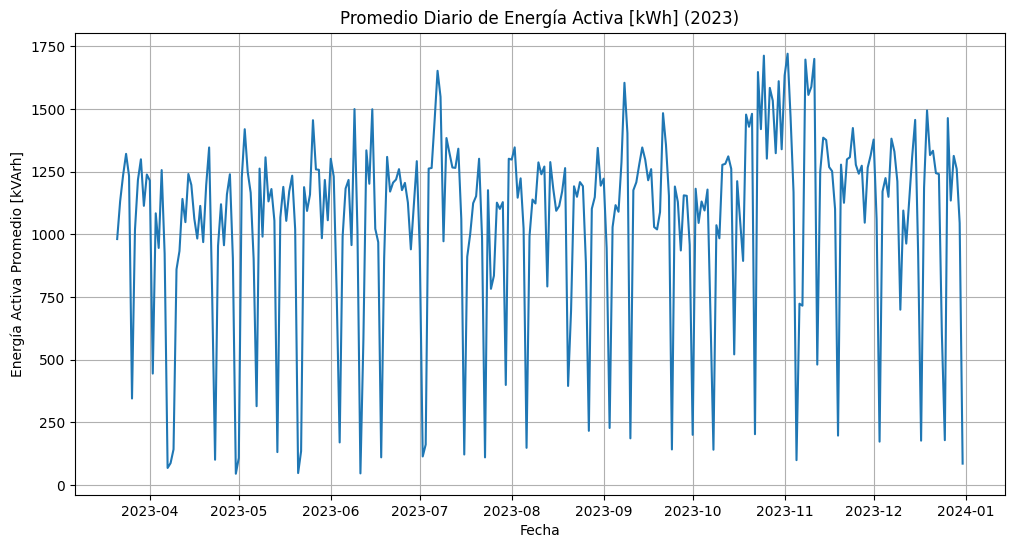

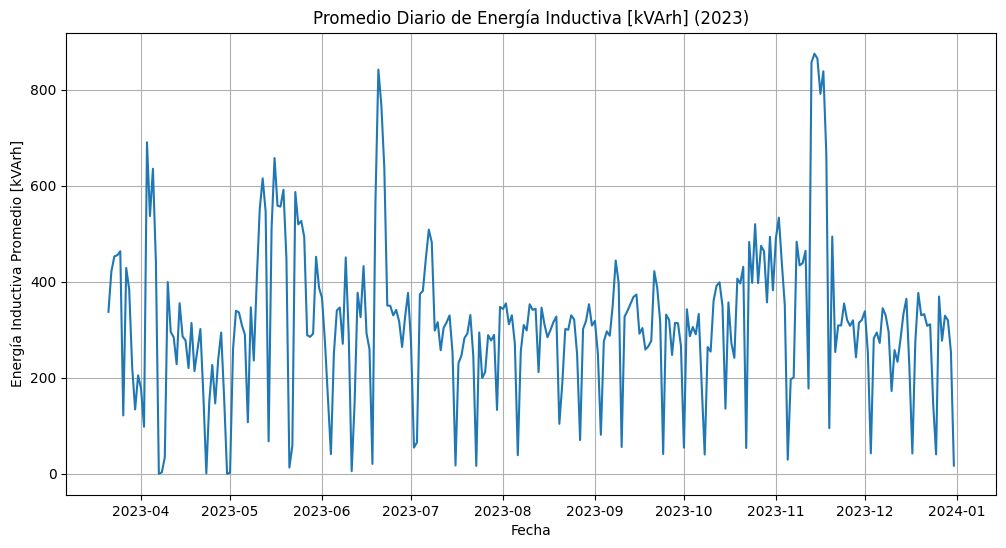

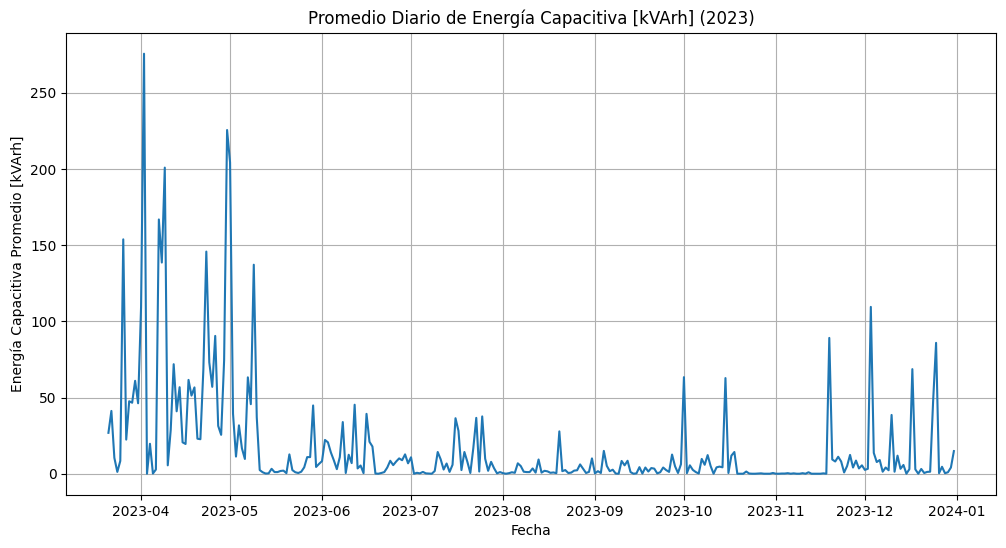

In [ ]:
# Agrupar por día y calcular el promedio diario de energía inductiva y capacitiva
energia_reactiva_diaria_2023 = db_2023.groupby('día_consumo')[['activa_[kwh]','inductiva_[kvarh]', 'capacitiva_[kvarh]']].mean().reset_index()

# Visualizar el promedio diario de energía inductiva
plt.figure(figsize=(12, 6))
sns.lineplot(data=energia_reactiva_diaria_2023, x='día_consumo', y='activa_[kwh]')
plt.title('Promedio Diario de Energía Activa [kWh] (2023)')
plt.xlabel('Fecha')
plt.ylabel('Energía Activa Promedio [kVArh]')
plt.grid(True)
plt.show()

# Visualizar el promedio diario de energía inductiva
plt.figure(figsize=(12, 6))
sns.lineplot(data=energia_reactiva_diaria_2023, x='día_consumo', y='inductiva_[kvarh]')
plt.title('Promedio Diario de Energía Inductiva [kVArh] (2023)')
plt.xlabel('Fecha')
plt.ylabel('Energía Inductiva Promedio [kVArh]')
plt.grid(True)
plt.show()

# Visualizar el promedio diario de energía capacitiva
plt.figure(figsize=(12, 6))
sns.lineplot(data=energia_reactiva_diaria_2023, x='día_consumo', y='capacitiva_[kvarh]')
plt.title('Promedio Diario de Energía Capacitiva [kVArh] (2023)')
plt.xlabel('Fecha')
plt.ylabel('Energía Capacitiva Promedio [kVArh]')
plt.grid(True)
plt.show()

Revisemos en detalle la energía activa:
Visualización de la Media Mensual (2023): Se grafica la media de 'activa_[kwh]' por mes para el año 2023 en un gráfico de lineas para visualizar la tendencias generales

Observando la línea, podemos identificar la tendencia general de la energía activa promedio a lo largo de los meses. Por ejemplo, podemos ver en qué meses el consumo promedio fue mayor o menor. La línea sube en algunos períodos y baja en otros, lo que sugiere variaciones en el consumo.

En particular, se puede notar un valle en el mes de abril, seguido de un aumento gradual hasta un pico en el mes de noviembre, y luego un descenso en diciembre. La disminución en abril y diciembre podría estar relacionada con una menor actividad en la instalación durante esos meses (por ejemplo, vacaciones, días festivos) o con condiciones climáticas que reduzcan la necesidad de ciertos equipos (como sistemas de climatización).

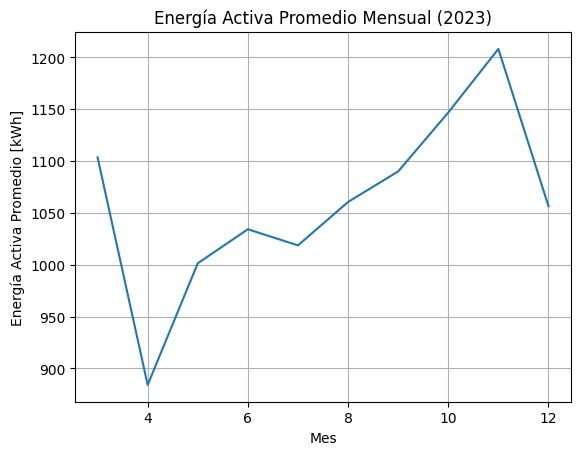

In [ ]:
sns.lineplot(data = db_meses_2023, x='mes',y='mean')
plt.title('Energía Activa Promedio Mensual (2023)')
plt.xlabel('Mes')
plt.ylabel('Energía Activa Promedio [kWh]')
plt.grid(True)
plt.show()

In [ ]:
#agrupar mes y dia para hacer boxplot

db_2023[['activa_[kwh]','mes','dia','hora']]

,activa_[kwh],mes,dia,hora
0,721.6252,3,21,1
1,966.0000,3,21,2
2,1313.8752,3,21,3
3,1598.5000,3,21,4
4,1541.0000,3,21,5
...,...,...,...,...
6859,94.8752,12,31,20
6860,92.0000,12,31,21
6861,94.8752,12,31,22
6862,92.0000,12,31,23


Según el boxplot siguiente: Los meses con medianas más altas (como noviembre) generalmente tuvieron días con mayor consumo típico que los meses con medianas más bajas (como abril).
Meses como marzo o abril muestran una mayor variabilidad en el consumo diario de energía en ese mes.

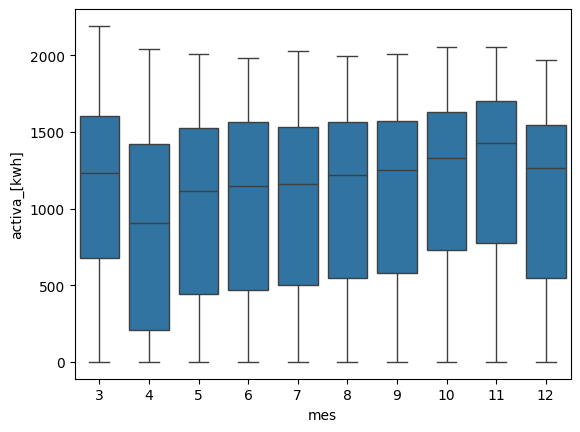

In [ ]:
sns.boxplot(x='mes', y='activa_[kwh]', data=db_2023)
plt.show()
#este grafico es con el db_2023 sin filtrar
#ojo la linea de la mitad es la mediana no la media o promedio

In [ ]:
#funcion graficar varios meses y cajas
def grafica_mes_box (mes):
  df_filtro = db_2023[db_2023['mes'] == mes][['activa_[kwh]', 'dia', 'hora']]
  plt.figure(figsize=(12, 6))
  sns.boxplot(x='dia', y='activa_[kwh]', data=df_filtro)
  plt.title(f'Boxplot de Energía del mes: {mes}')
  plt.ylabel('Energía Activa [kWh]')
  plt.show()


Nota: los datos van desde el dia 21 (marzo) porque así está en la base de datos proporcionada.
Según los boxplot mostrados a continuación:

-Importante mencionar que al tratarse de un autogenerador, su consumo diario puede estar afectado por una producción de energía solar de autoconsumo, afectando en la mayoria de los dias el comportamiento.

-el análisis detallado de los boxplots diarios para cada mes de marzo a diciembre de 2023 revela la variabilidad intrínseca en el consumo de energía activa a lo largo del año. Se observa una tendencia general en la que meses como noviembre presentan medianas diarias más altas, indicando un mayor consumo típico en esos periodos. Crucialmente, los gráficos exponen la presencia recurrente de días con consumos de energía atípicamente bajos y distribuciones muy concentradas en valores reducidos, explicables en la mayoria de los casos a que fueron dias domingos o festivos, sin embargo en otras ocasiones podría ser debido a factores operativos o condiciones que redujeron la demanda de energía.



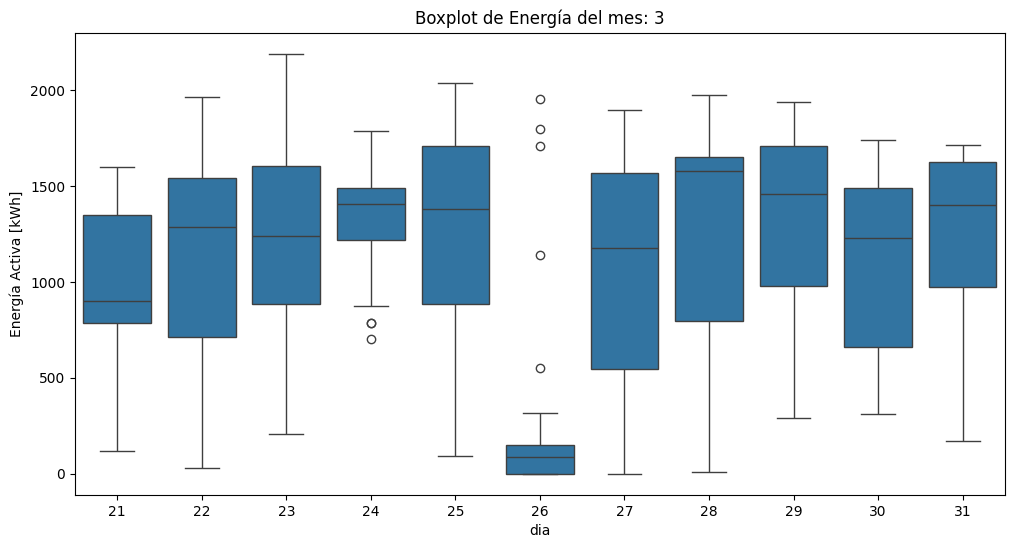

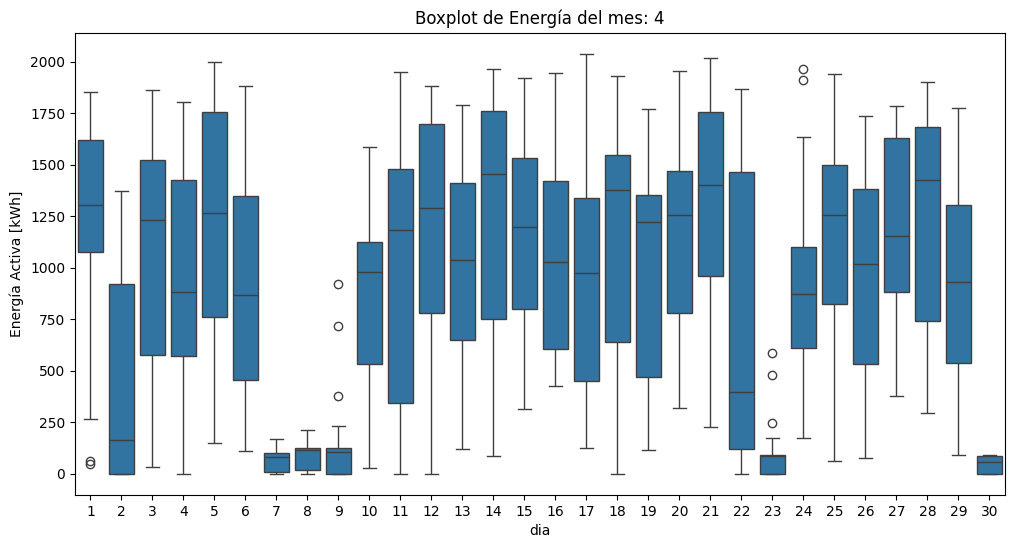

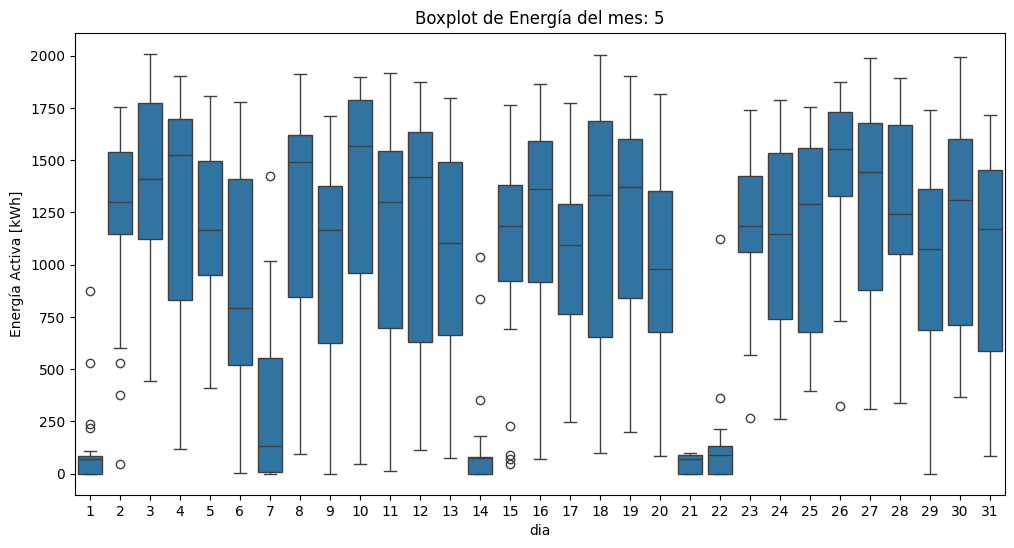

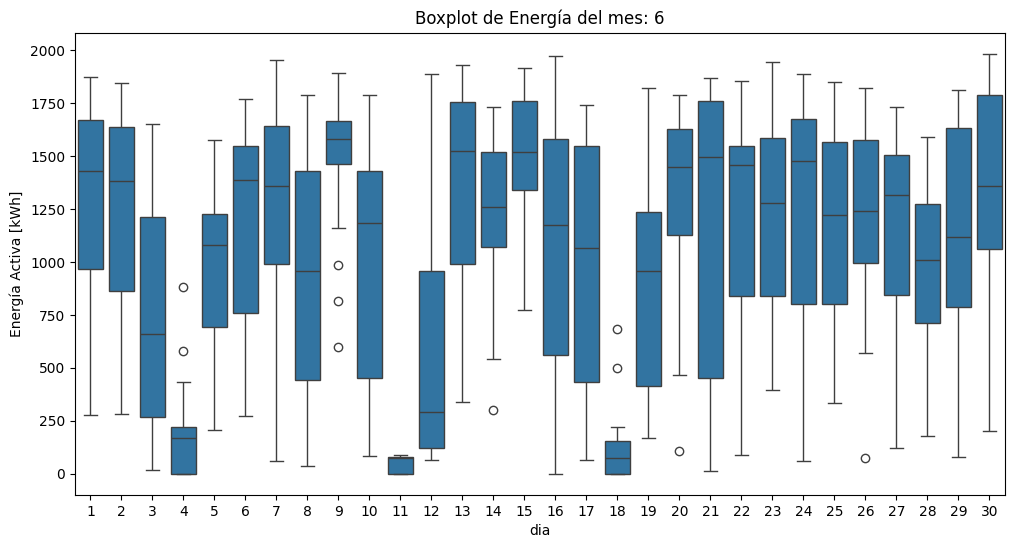

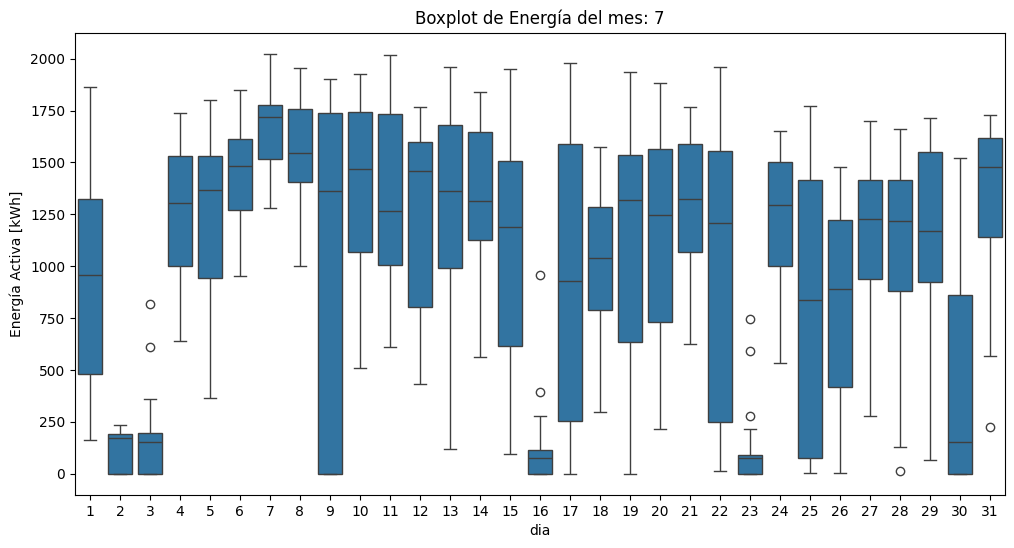

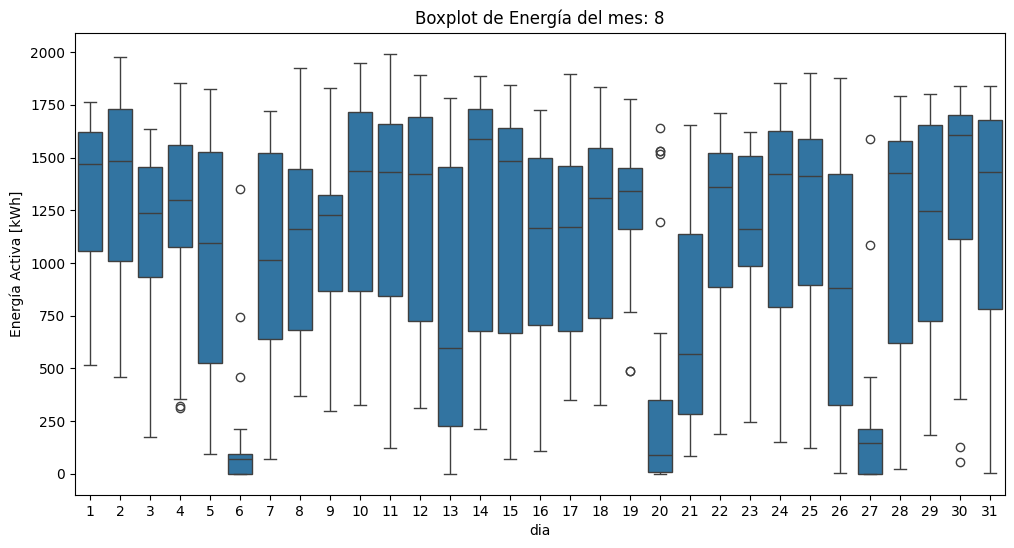

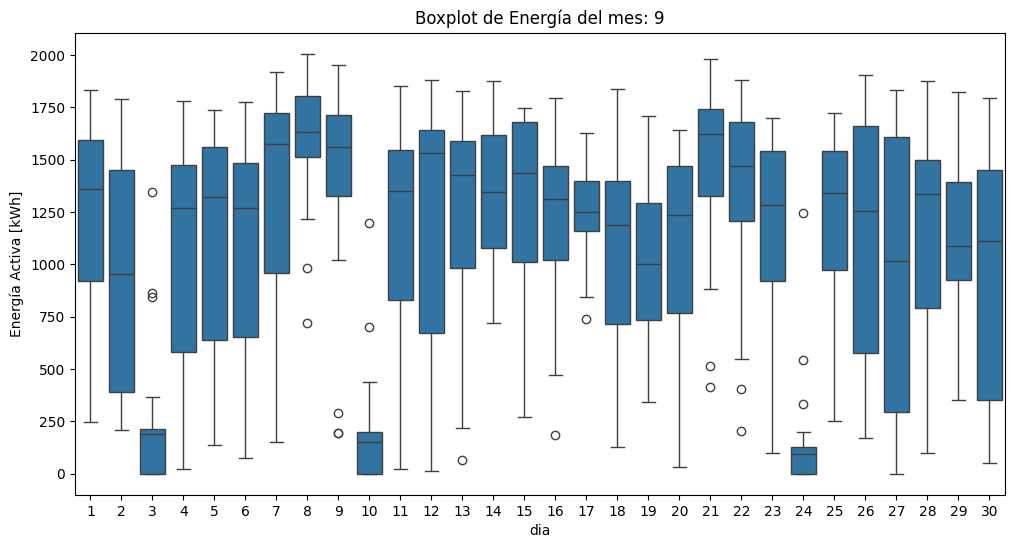

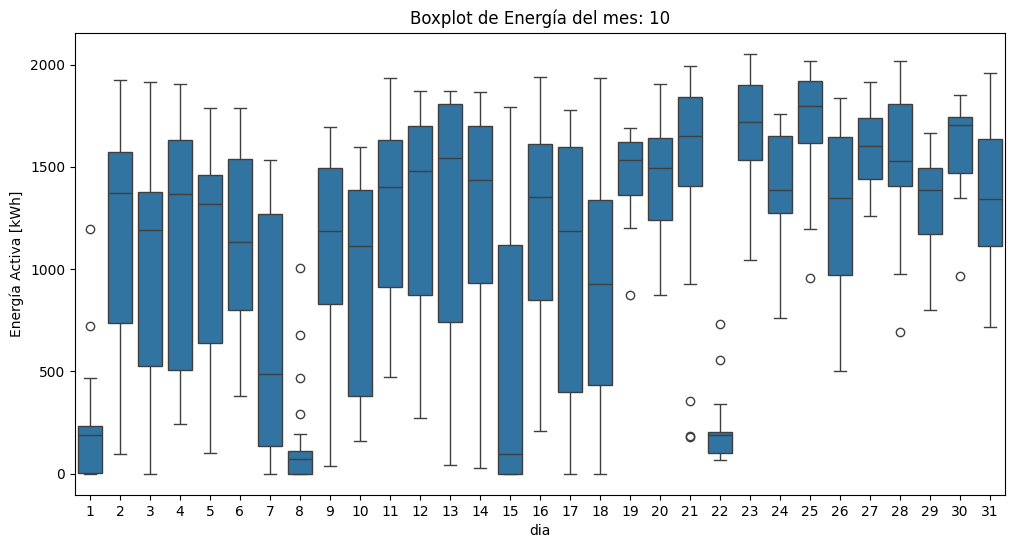

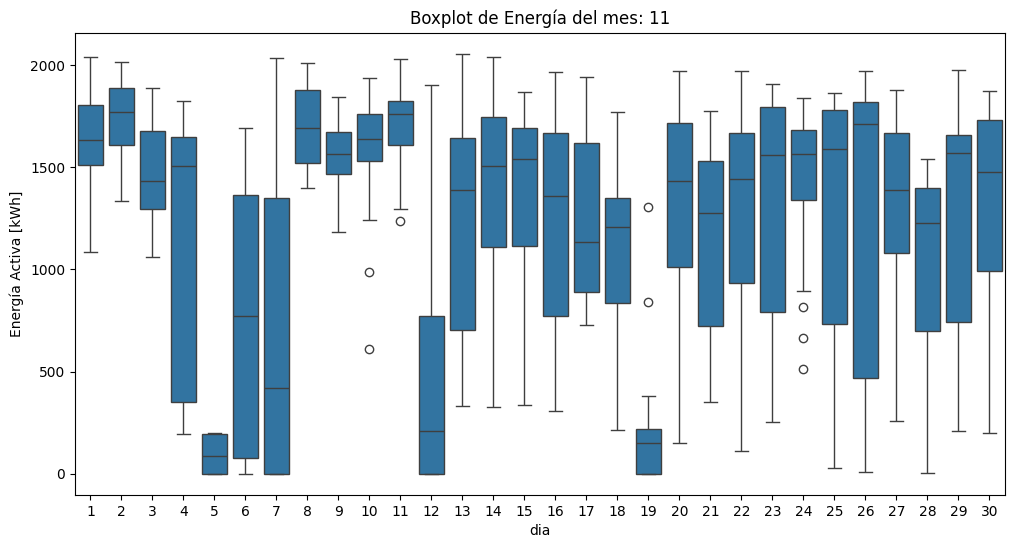

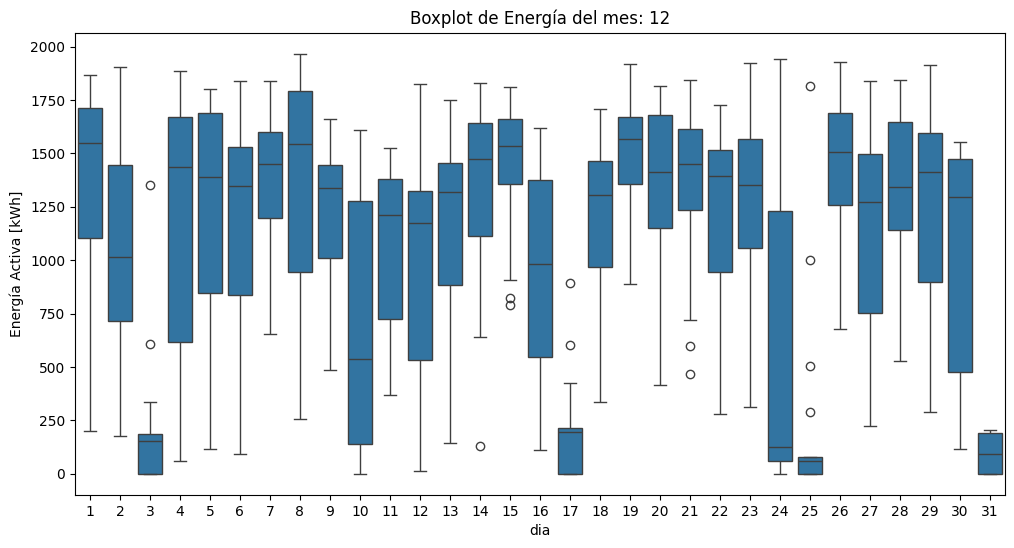

In [ ]:
for i in range (3,13):
  grafica_mes_box(i)

a continaución revisamos la distribucion de consunmo  por dia de semana, el cual confirma consunos bajos sobre los dias domingos



/tmp/ipython-input-4028222132.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db_2023['día_semana'] = db_2023['día_consumo'].dt.dayofweek
/tmp/ipython-input-4028222132.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db_2023['nombre_día_semana'] = db_2023['día_semana'].map(dias_semana_map)


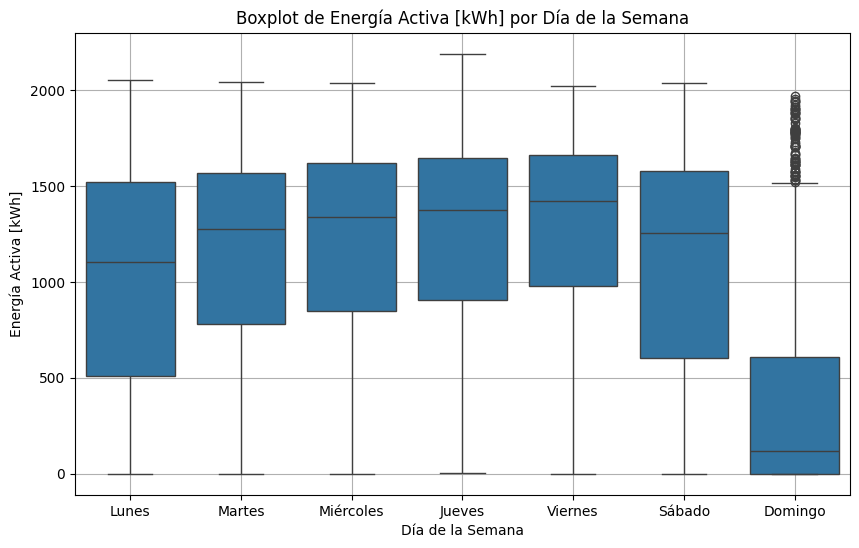

In [ ]:

if 'día_semana' not in db_2023.columns:

    db_2023['día_semana'] = db_2023['día_consumo'].dt.dayofweek
    dias_semana_map = {0: 'Lunes', 1: 'Martes', 2: 'Miércoles', 3: 'Jueves', 4: 'Viernes', 5: 'Sábado', 6: 'Domingo'}
    db_2023['nombre_día_semana'] = db_2023['día_semana'].map(dias_semana_map)


# Boxplot de Energía Activa por Día de la Semana
plt.figure(figsize=(10, 6))
sns.boxplot(x='nombre_día_semana', y='activa_[kwh]', data=db_2023, order=['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo'])
plt.title('Boxplot de Energía Activa [kWh] por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Energía Activa [kWh]')
plt.grid(True)
plt.show()

In [ ]:
#db_2023[['activa_[kwh]','mes','dia','hora']].groupby('mes','activa_[kwh]')
#db_2023[['mes','activa_[kwh]']].groupby('mes').mean()
db_energia_mes = db_2023[['mes','activa_[kwh]']].groupby('mes').sum()

In [ ]:
def grafica_dia_linea (mes):
  df_filtro_dia = db_2023[db_2023['mes'] == mes][['activa_[kwh]', 'dia']].groupby('dia').sum()
  plt.figure(figsize=(9, 4))
  sns.lineplot(x='dia', y='activa_[kwh]', data=df_filtro_dia)
  plt.title(f' Energía total consumida del mes: {mes}')
  plt.ylabel('Energía Activa [kWh]')
  plt.show()

Los graficos de lineas mostrados a continuación, muestra el consumo total de energía por mes. Confirman visualmente la presencia de días específicos con consumo de energía atípicamente bajo en cada mes. Nos permiten ver exactamente cuándo ocurrieron estas caídas en el consumo y cuán pronunciadas fueron. Además podemos ver mes a mes como cambia el consumo de energía aumentado progresivamente: si tomamos como referencia abril tiene un pico que ronda los 30000 kWh a comparación de noviembre que ronda los 40000 kWh

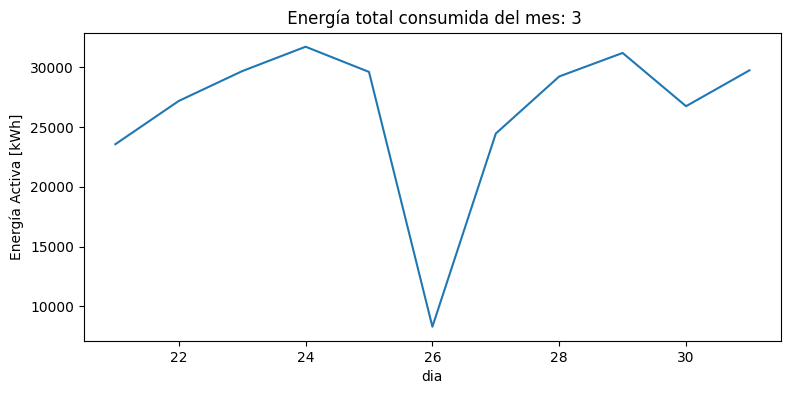

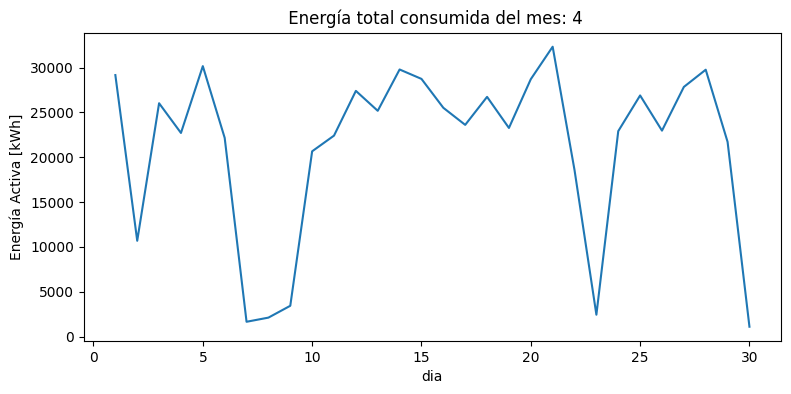

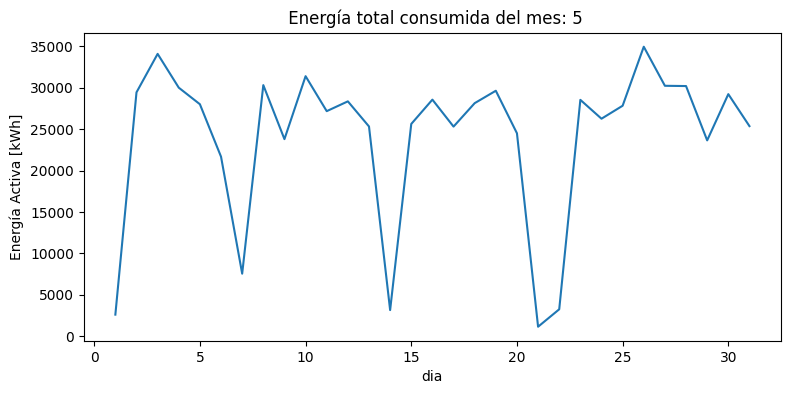

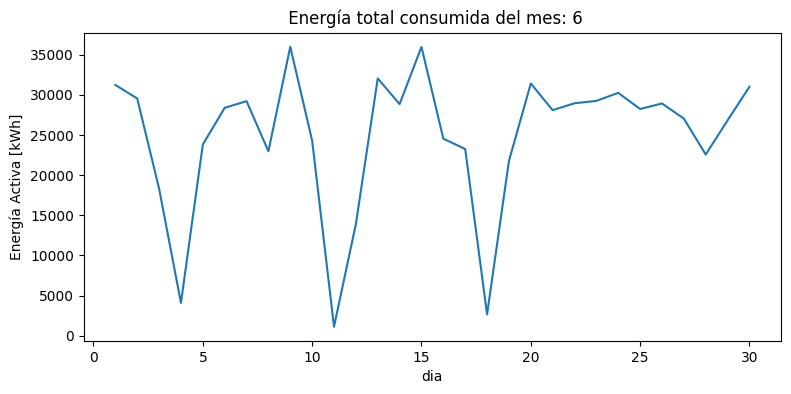

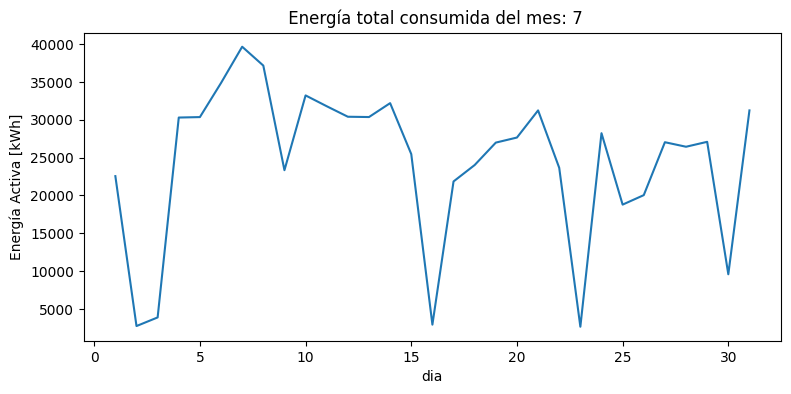

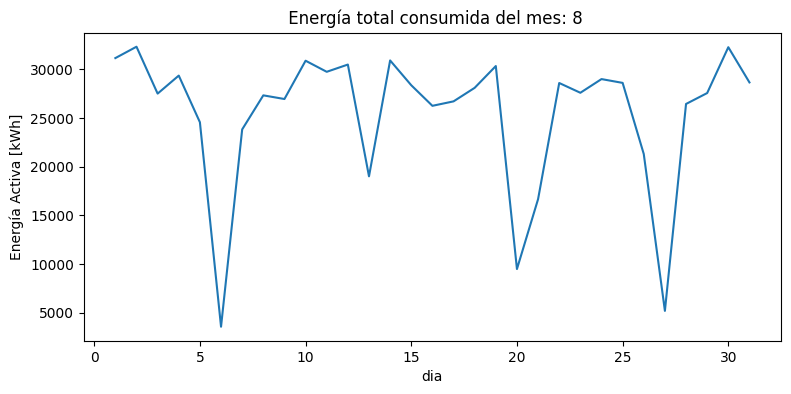

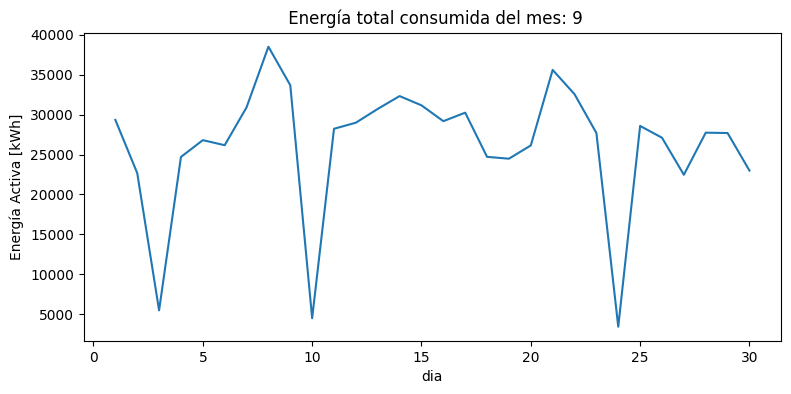

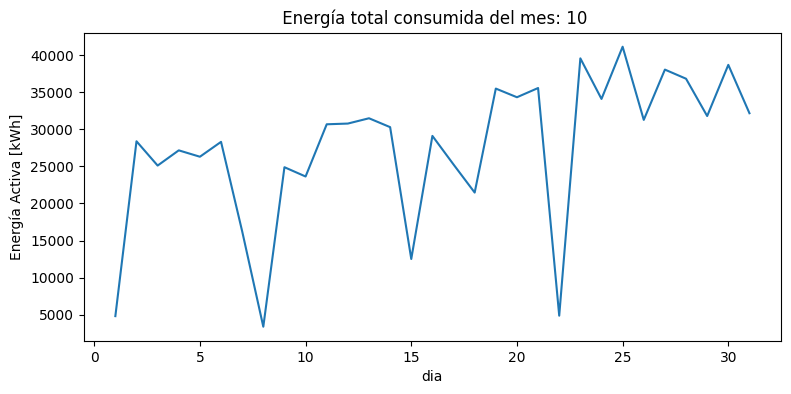

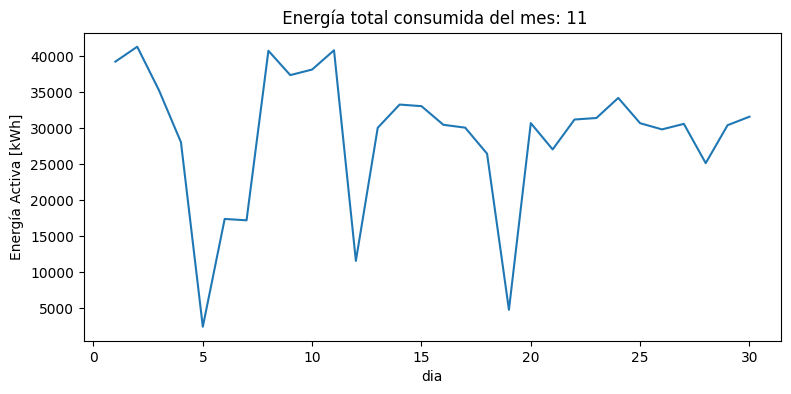

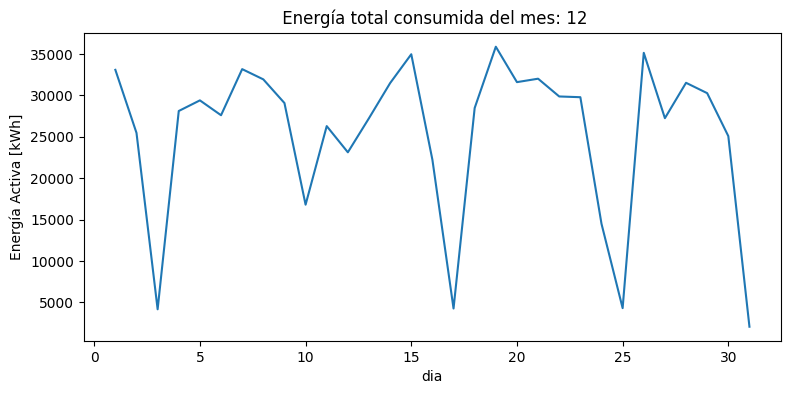

In [ ]:
for i in range (3,13):
  grafica_dia_linea(i)


Con la información analizada y teniendo en cuenta que se trata de un autogenerador a gran escala, nos gustaría encontrar el tamaño de la capacidad de autogeneración,  por regulación colombiana su capacidad de generación debe ser mayor a 1 MW.

In [ ]:
max_energia_horaria = db['activa_[kwh]'].max()

print(f'El valor máximo de energía activa registrada en una hora es: {max_energia_horaria:.2f} kWh')

El valor máximo de energía activa registrada en una hora es: 2190.75 kWh


Con esta informacion se podría establecer la cantidad de paneles solares requeridos, dimensionamiento terreno, etc y si me interesa tener una instalacion similar analizo este comportamiento de energía, claramente teniendo en cuenta la ubicación.

el siguiente paso será analizar cuánto fue el ahorro en la factura de energía por autogeneracion.

--> otro posible analisis: determinar el tamaño de otro parque solar, con distinta capacidad y simular la energía generada. (Machine learning)


##2.1  Análisis del Perfil de Carga o Patrón de Consumo horario

Vamos a analizar cómo varía la energía activa (`activa_[kwh]`) a lo largo de las horas del día y los días de la semana para identificar patrones de consumo típicos.

/tmp/ipython-input-4026644593.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db_2023['día_semana'] = db_2023['día_consumo'].dt.dayofweek
/tmp/ipython-input-4026644593.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db_2023['nombre_día_semana'] = db_2023['día_semana'].map(dias_semana_map)


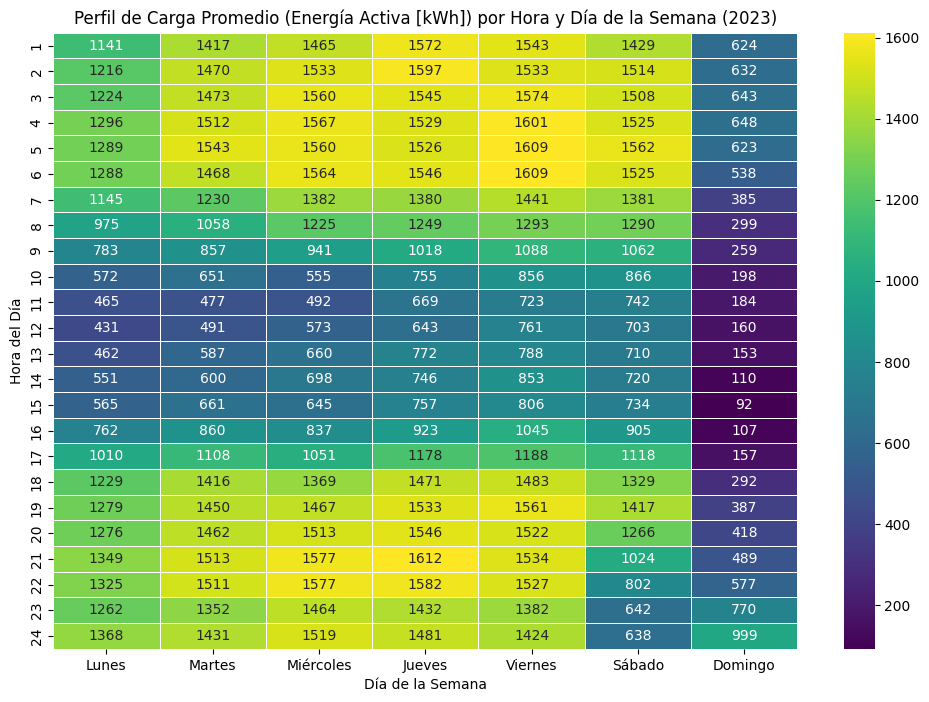

In [ ]:

# Extraer el día de la semana (0=Lunes, 6=Domingo)
db_2023['día_semana'] = db_2023['día_consumo'].dt.dayofweek

# Mapear números de día a nombres de día para mejor visualización
dias_semana_map = {0: 'Lunes', 1: 'Martes', 2: 'Miércoles', 3: 'Jueves', 4: 'Viernes', 5: 'Sábado', 6: 'Domingo'}
db_2023['nombre_día_semana'] = db_2023['día_semana'].map(dias_semana_map)

# Agrupar por día de la semana y hora, y calcular la media de energía activa
perfil_carga_2023 = db_2023.groupby(['nombre_día_semana', 'hora'])['activa_[kwh]'].mean().reset_index()

# Reorganizar los datos para el mapa de calor
perfil_carga_pivot_2023 = perfil_carga_2023.pivot(index='hora', columns='nombre_día_semana', values='activa_[kwh]')

# Definir el orden de los días de la semana
orden_dias = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']
perfil_carga_pivot_2023 = perfil_carga_pivot_2023[orden_dias]

# Visualizar el perfil de carga con un mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(perfil_carga_pivot_2023, cmap='viridis', annot=True, fmt=".0f", linewidths=.5)
plt.title('Perfil de Carga Promedio (Energía Activa [kWh]) por Hora y Día de la Semana (2023)')
plt.xlabel('Día de la Semana')
plt.ylabel('Hora del Día')
plt.show()

El anterior mapa de calor, nos muestra que esta instalación tiene patrones de consumo altos especialmente en los dias martes a jueves particularmente en horas de la noche y en la madrugada antes de que salga el sol. Aproximademante a partir de las 7 u 8 am hasta las 16 o 17 horas el consumo disminuye. Los dias lunes al verse afectado por varios festivos los consumos no presentan dicho comportamiento. Los domingos se presenta el consummo más bajo de todos los dias, claramente al tratarse de dias no laborales.  

Consultando varias fuentes, esta instalación podría tratarse de:

*   muy probablemente de un autogenerador solar fotovoltaico, entonces en el día parte de la demanda es cubierta por la generación propia, y por eso el “consumo neto” registrado desde la red se ve más bajo, Es decir: la empresa puede estar autoconsumiendo directamente la energía solar en horario diurno, reduciendo la demanda registrada en el gráfico. En cambio, en la noche no hay generación solar, por lo que el consumo de la red aumenta hasta 1.5 MW.
*   Molinos, cementeras o siderúrgicas las cuales pueden programar la mayor producción en la noche para aprovechar tarifas de energía más bajas (si están conectados al mercado regulado o no regulado).






##2.2 Perfil de Excedentes

Ahora, analicemos cómo varían los excedentes de energía (`excedentes_[kwh]`) a lo largo de las horas del día y los días de la semana. Esto puede darnos pistas sobre el patrón de generación del autogenerador.

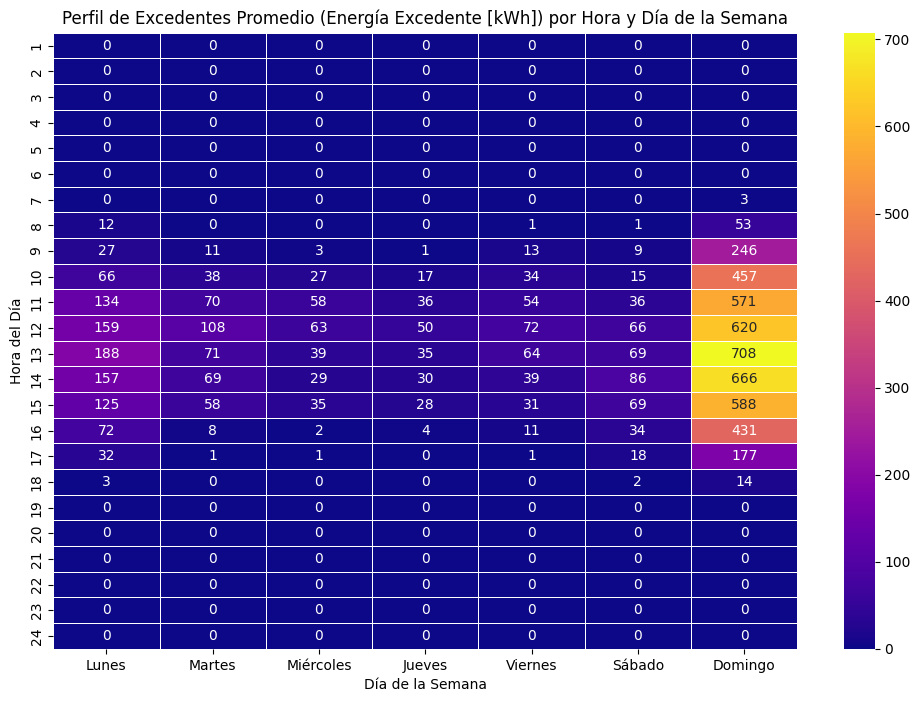

In [ ]:

# Extraer el día de la semana (0=Lunes, 6=Domingo)
db['día_semana'] = db['día_consumo'].dt.dayofweek

# Mapear números de día a nombres de día para mejor visualización
dias_semana_map = {0: 'Lunes', 1: 'Martes', 2: 'Miércoles', 3: 'Jueves', 4: 'Viernes', 5: 'Sábado', 6: 'Domingo'}
db['nombre_día_semana'] = db['día_semana'].map(dias_semana_map)

# Agrupar por día de la semana y hora, y calcular la media de excedentes
perfil_excedentes = db.groupby(['nombre_día_semana', 'hora'])['excedentes_[kwh]'].mean().reset_index()

# Reorganizar los datos para el mapa de calor
perfil_excedentes_pivot = perfil_excedentes.pivot(index='hora', columns='nombre_día_semana', values='excedentes_[kwh]')

# Definir el orden de los días de la semana
orden_dias = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']
perfil_excedentes_pivot = perfil_excedentes_pivot[orden_dias]

# Visualizar el perfil de excedentes con un mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(perfil_excedentes_pivot, cmap="plasma", annot=True, fmt=".0f", linewidths=.5) # Usamos otro colormap para diferenciar
plt.title('Perfil de Excedentes Promedio (Energía Excedente [kWh]) por Hora y Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Hora del Día')
plt.show()

En el mapa anterior, podemos ver el patrón de generación de exedentes, este se da pricipalmente en los dias que normalmente no hay mucha actividad laboral como los lunes (afectado por festivos) y los domingos. El resto de dias en semana tambien hay generación de exedentes pero mucho menores

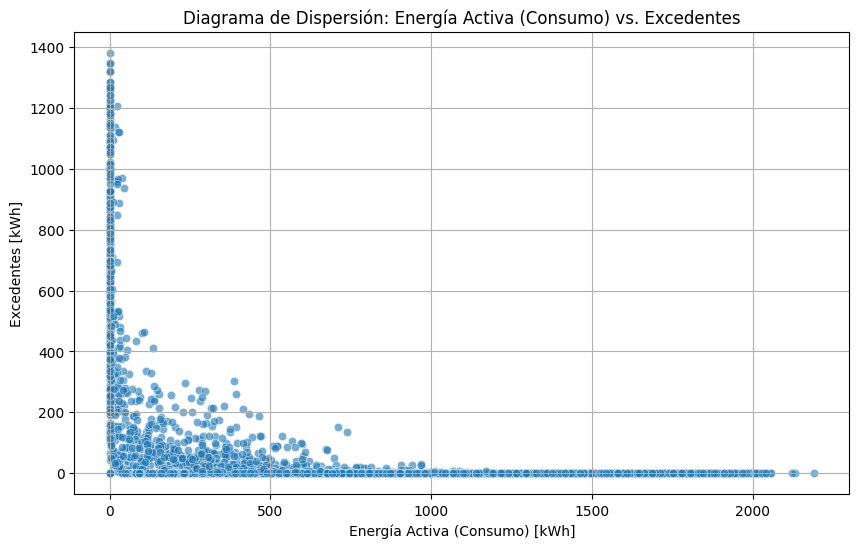

In [ ]:
# Crear un diagrama de dispersión entre activa_[kwh] y excedentes_[kwh]
plt.figure(figsize=(10, 6))
sns.scatterplot(data=db_2023, x='activa_[kwh]', y='excedentes_[kwh]', alpha=0.6) # alpha para manejar la superposición de puntos
plt.title('Diagrama de Dispersión: Energía Activa (Consumo) vs. Excedentes')
plt.xlabel('Energía Activa (Consumo) [kWh]')
plt.ylabel('Excedentes [kWh]')
plt.grid(True)
plt.show()

El grafico de puntos anterior trata de mostrar la correlación entre las dos vaiables. En general, el gráfico de dispersión confirma que los excedentes son un evento que no ocurre constantemente y que tienden a presentarse cuando el consumo de la instalación no es extremadamente alto, lo cual es coherente con un escenario donde la generación solar cubre la demanda interna y el exceso se registra como excedente.

## 2.3 Energía Reactiva

los siguientes gráficos muestra el consumo de inductiva y capacitiva por hora y dia de la semana.



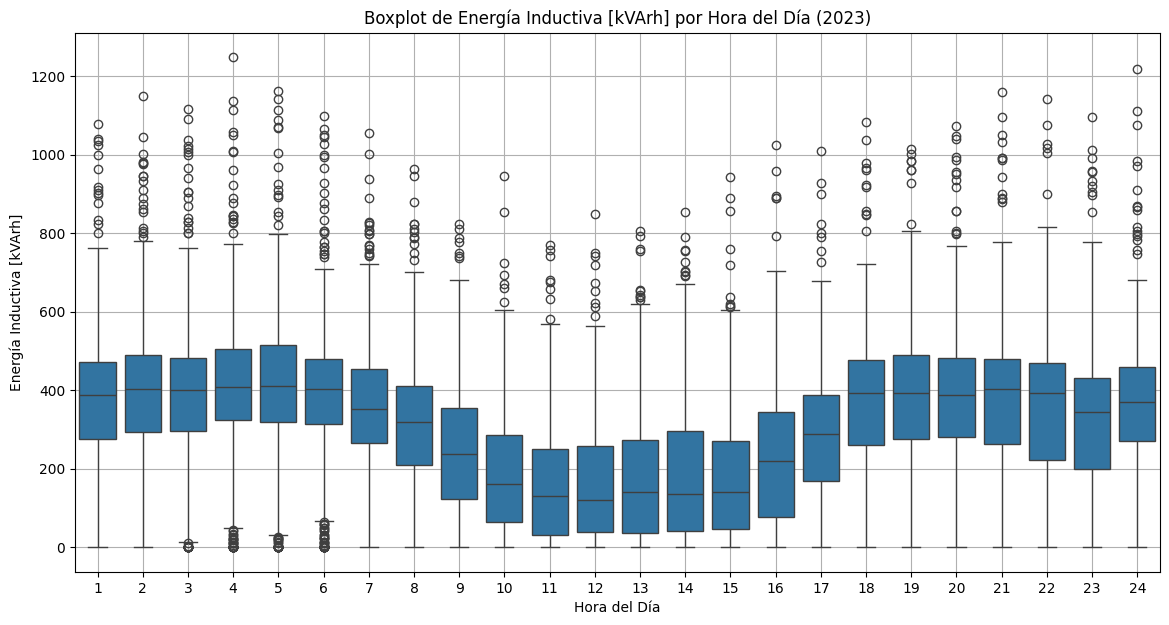

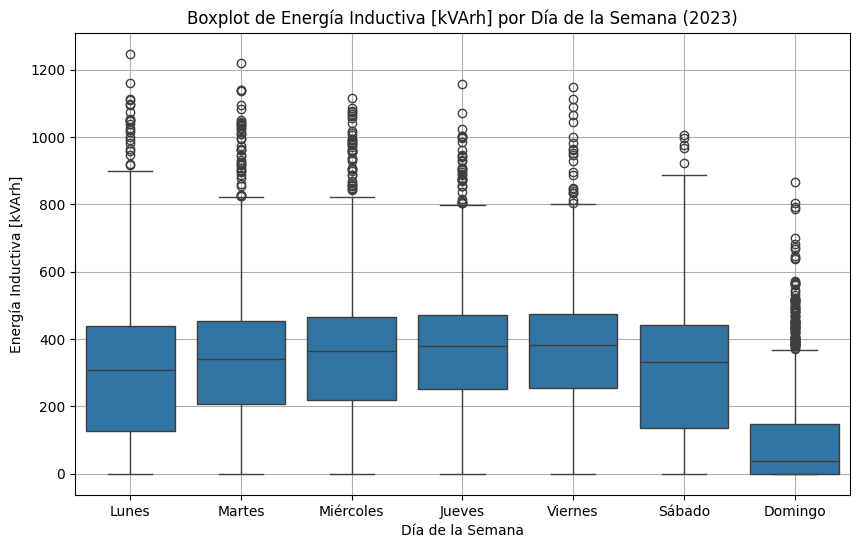

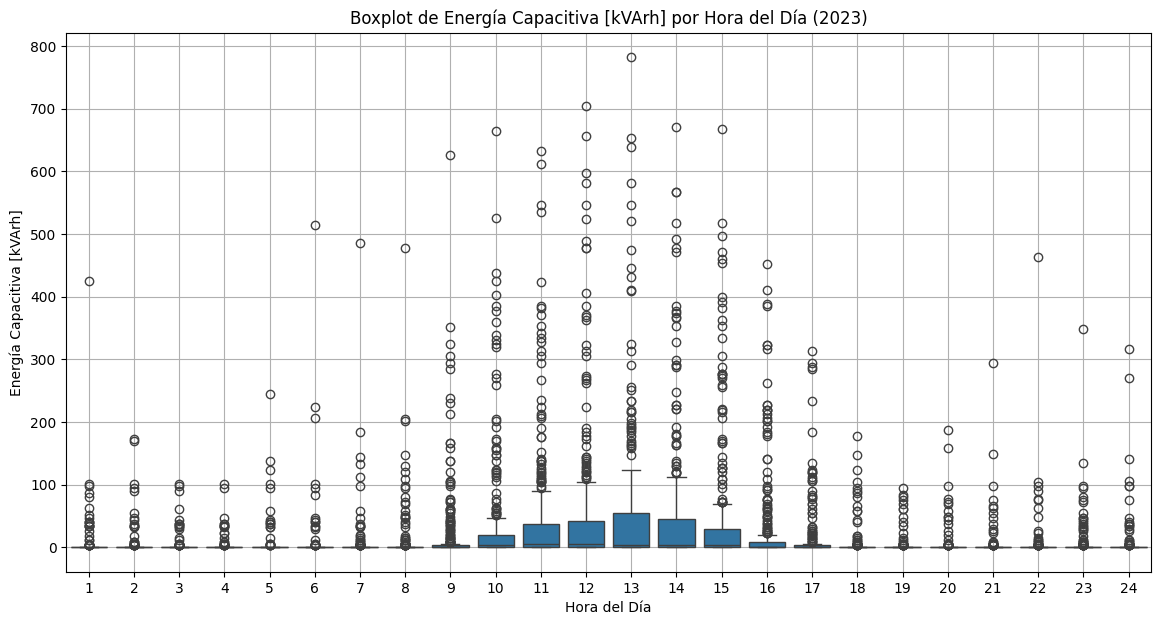

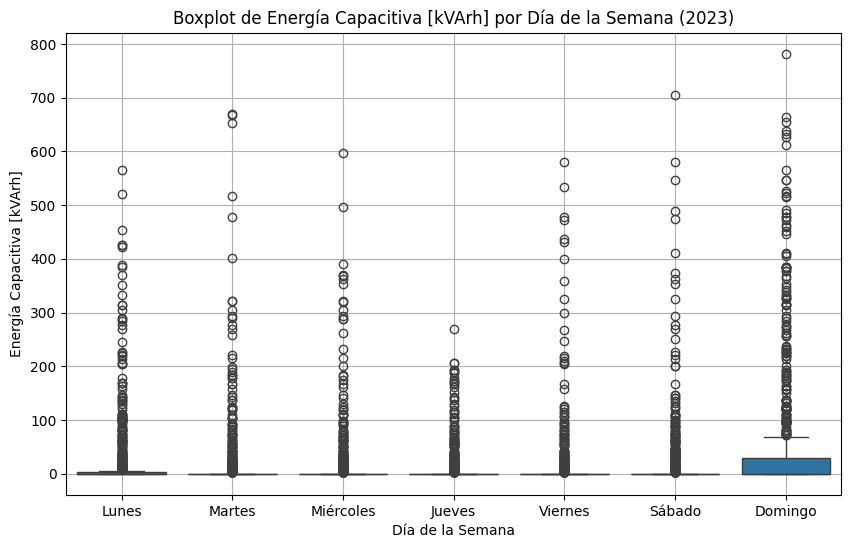

In [ ]:

if 'día_semana' not in db_2023.columns:
    dias_semana_map = {0: 'Lunes', 1: 'Martes', 2: 'Miércoles', 3: 'Jueves', 4: 'Viernes', 5: 'Sábado', 6: 'Domingo'}
    db_2023['nombre_día_semana'] = db_2023['día_semana'].map(dias_semana_map)

# Boxplot de Energía Inductiva por Hora del Día
plt.figure(figsize=(14, 7))
sns.boxplot(x='hora', y='inductiva_[kvarh]', data=db_2023)
plt.title('Boxplot de Energía Inductiva [kVArh] por Hora del Día (2023)')
plt.xlabel('Hora del Día')
plt.ylabel('Energía Inductiva [kVArh]')
plt.grid(True)
plt.show()

# Boxplot de Energía Inductiva por Día de la Semana
plt.figure(figsize=(10, 6))
sns.boxplot(x='nombre_día_semana', y='inductiva_[kvarh]', data=db_2023, order=['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo'])
plt.title('Boxplot de Energía Inductiva [kVArh] por Día de la Semana (2023)')
plt.xlabel('Día de la Semana')
plt.ylabel('Energía Inductiva [kVArh]')
plt.grid(True)
plt.show()

# Boxplot de Energía Capacitiva por Hora del Día
plt.figure(figsize=(14, 7))
sns.boxplot(x='hora', y='capacitiva_[kvarh]', data=db_2023)
plt.title('Boxplot de Energía Capacitiva [kVArh] por Hora del Día (2023)')
plt.xlabel('Hora del Día')
plt.ylabel('Energía Capacitiva [kVArh]')
plt.grid(True)
plt.show()

# Boxplot de Energía Capacitiva por Día de la Semana
plt.figure(figsize=(10, 6))
sns.boxplot(x='nombre_día_semana', y='capacitiva_[kvarh]', data=db_2023, order=['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo'])
plt.title('Boxplot de Energía Capacitiva [kVArh] por Día de la Semana (2023)')
plt.xlabel('Día de la Semana')
plt.ylabel('Energía Capacitiva [kVArh]')
plt.grid(True)
plt.show()

de los anteriores gráficos podemos concluir:


-energía inductiva: se observa un mayor consumo de energía reactiva inductiva en las horas sin radiación solar. Sin embargo, durante las horas de sol este valor disminuye de manera considerable. La razón es que, al entrar en operación el sistema de autogeneración, parte de la potencia activa es suministrada localmente por la planta solar. Desde el punto de vista del sistema de medida, la red entrega menos potencia activa y, en consecuencia, también se reduce la componente de reactiva vista desde la red. En términos del diagrama de potencias, al acortarse el vector de activa proveniente de la red, la proyección de la reactiva asociada también se ve disminuida.

-energía capacitiva: los valores se ubican por debajo de los 100 kVArh; desde las 10 am hasta las 4 pm es cuando mayor consumo hay. Podemos decir que se "inyectan" energía capacitiva para poder nivelar en esos momentos de mayor actividad del sistema por ejemplo el factor de potencia.

## 2.4 Cálculo factor de potencia

,activa_[kwh],inductiva_[kvarh],capacitiva_[kvarh],energia_reactiva_total_[kvarh],energia_aparente_[kvah],factor_potencia
0,721.6252,34.5000,25.8752,8.6248,721.676740,0.999929
1,966.0000,140.8752,5.7500,135.1252,975.404952,0.990358
2,1313.8752,373.7500,0.0000,373.7500,1366.000404,0.961841
3,1598.5000,580.7500,0.0000,580.7500,1700.727142,0.939892
4,1541.0000,598.0000,0.0000,598.0000,1652.962492,0.932266



Resumen estadístico del Factor de Potencia:


,factor_potencia
count,8784.000000
mean,0.890591
std,0.221694
min,0.000000
25%,0.936163
50%,0.959890
75%,0.970451
max,1.000000


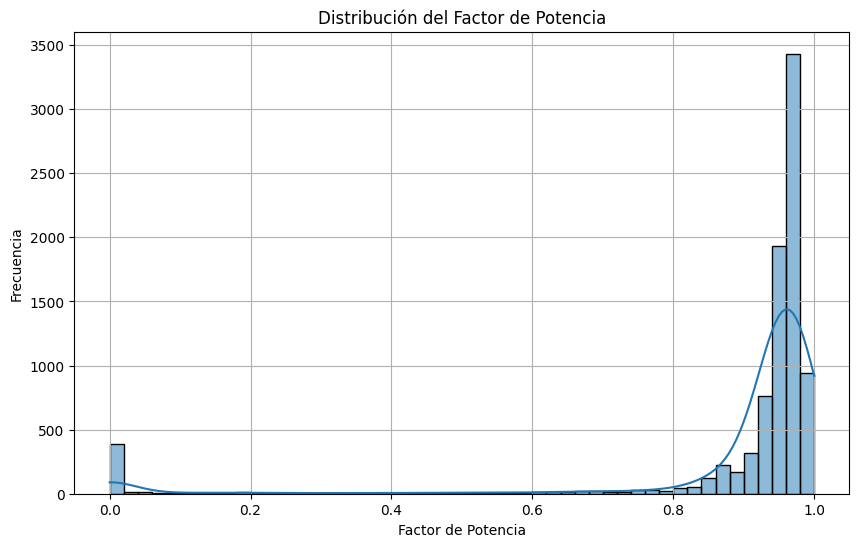

In [ ]:
# Calcular la energía reactiva total (inductiva - capacitiva)
db['energia_reactiva_total_[kvarh]'] = db['inductiva_[kvarh]'] - db['capacitiva_[kvarh]']

# Calcular la energía aparente (S)
# S = sqrt(P^2 + Q^2), donde P es energía activa y Q es energía reactiva total
import numpy as np
db['energia_aparente_[kvah]'] = np.sqrt(db['activa_[kwh]']**2 + db['energia_reactiva_total_[kvarh]']**2)

# Calcular el factor de potencia (FP = P / S)
# Manejar el caso donde la energía aparente es cero para evitar divisiones por cero
db['factor_potencia'] = db.apply(lambda row: row['activa_[kwh]'] / row['energia_aparente_[kvah]'] if row['energia_aparente_[kvah]'] != 0 else 1, axis=1)

# Mostrar las primeras filas con las nuevas columnas
display(db[['activa_[kwh]', 'inductiva_[kvarh]', 'capacitiva_[kvarh]', 'energia_reactiva_total_[kvarh]', 'energia_aparente_[kvah]', 'factor_potencia']].head())

# Analizar el factor de potencia
print("\nResumen estadístico del Factor de Potencia:")
display(db['factor_potencia'].describe())

# Visualizar la distribución del factor de potencia
plt.figure(figsize=(10, 6))
sns.histplot(db['factor_potencia'], bins=50, kde=True)
plt.title('Distribución del Factor de Potencia')
plt.xlabel('Factor de Potencia')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

## 3. Conclusiones

1. Carga de Datos y Limpieza:

*   Se realizó una limpieza efectiva de los nombres de las columnas para facilitar su manejo.
*   Se verificó la ausencia de valores nulos en el conjunto de datos.
*   La columna de fecha fue correctamente convertida y se extrajeron componentes de tiempo (año, mes, día) para análisis temporales

2. Análisis de Energía Activa, Inductiva y Capacitiva:



*   El mapa de calor del perfil de carga mostró un consumo de energía activa más alto durante la noche y la madrugada en días laborables (martes a jueves), con una disminución durante las horas diurnas. Esto sugiere que una parte significativa de la demanda diurna podría estar siendo cubierta por la autogeneración.

*   El mapa de calor de excedentes confirmó que la generación de excedentes ocurre principalmente durante las horas diurnas y es más pronunciada en días no laborables (lunes, domingos), lo que respalda la hipótesis de la autogeneración solar fotovoltaica.
*   El diagrama de dispersión entre energía activa y excedentes indicó que los excedentes tienden a ocurrir cuando el consumo de la red es menor, lo cual es coherente con un sistema de autoconsumo con inyección de excedentes

4. Análisis del Factor de Potencia:

La distribución del factor de potencia mostró que la mayoría de las mediciones se encuentran en valores altos (cercanos a 1), lo cual es generalmente deseable para la eficiencia del sistema eléctrico.
